# Training an Artificial Neural Network on the MNIST Dataset

## 1. Import Necessary Libraries

First, import the required libraries for building and training the neural network.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical

## 2. Load and Preprocess the MNIST Dataset

Load the MNIST dataset, normalize the images, and convert the labels to one-hot encoded format.

In [2]:
# Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Normalize the data (scale the pixel values to the range 0 to 1)
X_train = X_train / 255.0
X_test = X_test / 255.0

# Convert labels to categorical one-hot encoding
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

Training data shape: (60000, 28, 28)
Training labels shape: (60000, 10)
Test data shape: (10000, 28, 28)
Test labels shape: (10000, 10)


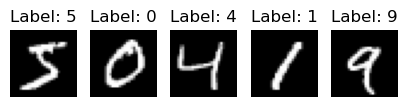

In [12]:
# Inspect the data

# Print the shape of the dataset
print(f'Training data shape: {X_train.shape}')
print(f'Training labels shape: {y_train.shape}')
print(f'Test data shape: {X_test.shape}')
print(f'Test labels shape: {y_test.shape}')

# Visualize some examples from the dataset
def plot_sample_images(X, y, num_samples=5):
    plt.figure(figsize=(5, 1))
    for i in range(num_samples):
        plt.subplot(1, num_samples, i+1)
        plt.imshow(X[i], cmap='gray')
        plt.title(f'Label: {np.argmax(y[i])}')
        plt.axis('off')
    plt.show()

plot_sample_images(X_train, y_train)

## 3. Build the Neural Network Model

Create a neural network model using the Sequential API with layers for flattening, dense layers, batch normalization, and dropout for regularization.

In [3]:
# Build the model
model = Sequential([
    Flatten(input_shape=(28, 28)),  # Flatten the 28x28 images into 1D vectors of 784 elements
    Dense(512, activation='relu', kernel_initializer='he_uniform'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(256, activation='relu', kernel_initializer='he_uniform'),
    BatchNormalization(),
    Dropout(0.4),
    Dense(128, activation='relu', kernel_initializer='he_uniform'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(10, activation='softmax')  # Output layer with 10 neurons (one for each class) and softmax activation
])

# Display the model architecture
model.summary()


c:\Users\engpo\anaconda3\envs\deep_learning_for_vision_systems\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 571,018 (2.18 MB)

 Trainable params: 569,226 (2.17 MB)

 Non-trainable params: 1,792 (7.00 KB)

## 4. Compile the Model

Configure the model for training with the Adam optimizer, categorical cross-entropy loss function, and accuracy as the evaluation metric.

In [4]:
# Compile the model
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

## 5. Train the Model

Train the model on the training data with a validation split, specifying the number of epochs and batch size.

In [5]:
# Train the model
history = model.fit(
    X_train, y_train,  # Training data and labels
    epochs=10,         # Number of epochs
    batch_size=32,     # Batch size
    validation_split=0.2,  # Use 20% of the training data for validation
    verbose=2          # Verbose output
)

Epoch 1/10
1500/1500 - 14s - 10ms/step - accuracy: 0.8584 - loss: 0.4631 - val_accuracy: 0.9577 - val_loss: 0.1368
Epoch 2/10
1500/1500 - 10s - 7ms/step - accuracy: 0.9204 - loss: 0.2608 - val_accuracy: 0.9636 - val_loss: 0.1177
Epoch 3/10
1500/1500 - 9s - 6ms/step - accuracy: 0.9347 - loss: 0.2132 - val_accuracy: 0.9699 - val_loss: 0.0987
Epoch 4/10
1500/1500 - 9s - 6ms/step - accuracy: 0.9405 - loss: 0.1926 - val_accuracy: 0.9718 - val_loss: 0.0934
Epoch 5/10
1500/1500 - 10s - 7ms/step - accuracy: 0.9455 - loss: 0.1757 - val_accuracy: 0.9740 - val_loss: 0.0869
Epoch 6/10
1500/1500 - 11s - 7ms/step - accuracy: 0.9526 - loss: 0.1593 - val_accuracy: 0.9722 - val_loss: 0.0905
Epoch 7/10
1500/1500 - 10s - 6ms/step - accuracy: 0.9534 - loss: 0.1505 - val_accuracy: 0.9770 - val_loss: 0.0781
Epoch 8/10
1500/1500 - 9s - 6ms/step - accuracy: 0.9587 - loss: 0.1357 - val_accuracy: 0.9772 - val_loss: 0.0776
Epoch 9/10
1500/1500 - 9s - 6ms/step - accuracy: 0.9581 - loss: 0.1345 - val_accuracy: 0.9

## 6. Evaluate the Model

Evaluate the trained model on the test data to determine its accuracy and loss.

In [6]:
# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=1)
print(f'Test accuracy: {test_acc:.4f}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9729 - loss: 0.0825
Test accuracy: 0.9776


## 7. Predict and Analyze Wrong Predictions

Generate predictions on the test data and analyze the wrong predictions by comparing the predicted and true labels.

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


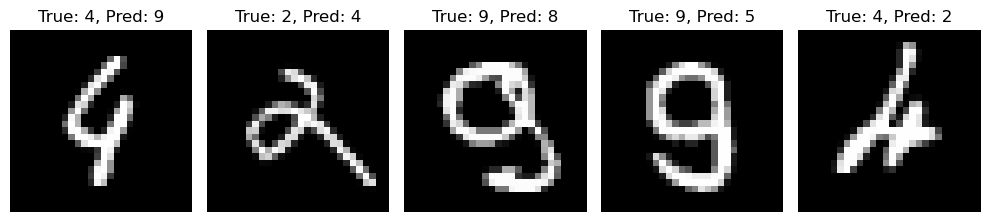

In [7]:
# Predict the labels for the test subset
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Find the indices of the wrong predictions
wrong_predictions = np.where(y_pred_classes != y_true_classes)[0]

# Visualize a few wrong predictions
num_wrong_predictions_to_show = 5  # Number of wrong predictions to display
plt.figure(figsize=(10, 5))  # Adjust the figure size for a more compact view
for i, index in enumerate(wrong_predictions[:num_wrong_predictions_to_show]):
    plt.subplot(1, num_wrong_predictions_to_show, i + 1)  # Display images in a single row
    plt.imshow(X_test[index], cmap='gray')
    plt.title(f"True: {y_true_classes[index]}, Pred: {y_pred_classes[index]}")
    plt.axis('off')
plt.tight_layout()
plt.show()
